In [ ]:
class Sodoku:
    def __init__(s,check,temp):
        s.board = [0 for i in range(81)]
        if check:
            s.board = temp
        s.known = [True if x != 0 else False for x in s.board]
        s.history = []

    def run(s):
        s.solver(0)

    def draw(s):
        for i in range(9):
            for j in range(9):
                print(s.board[9*i+j],end='  ')
            print()
        print()

    def checkRow(s,y):
        values = []
        for i in range(9):
            val = s.board[9*y+i]
            if val != 0:
                values.append(val)
        return values

    def checkCol(s,x,y):
        values = s.checkRow(y)
        for i in range(9):
            val = s.board[9*i+x]
            if val != 0 and val not in values:
                values.append(val)
        return values

    def checkSqu(s,x,y):
        sX = x // 3
        sY = y // 3
        values = s.checkCol(x,y)
        for i in range(3):
            for j in range(3):
                val = s.board[3*sY*9+3*sX+9*j+i]
                if val != 0 and val not in values:
                    values.append(val)
        return [i for i in range(1,10) if i not in values]

    def solver(s,i):
        s.history.append([x for x in s.board])
        if i >= 81:
            #Win
            s.draw()
            return True
        else:
            if s.board[i] != 0:
                return s.solver(i+1)
            else:
                #s.draw()
                temp = s.checkSqu(i%9,i//9)
                for x in temp:
                    s.board[i] = x
                    if s.solver(i+1):
                        return True
                s.board[i] = 0
                return False

In [ ]:
temp = [0,1,0,0,0,0,0,3,0,
        9,0,0,0,2,0,1,0,0,
        0,0,0,1,0,0,0,6,4,
        7,0,0,0,0,0,0,0,0,
        8,0,0,3,9,0,5,0,6,
        0,0,0,0,0,0,0,4,9,
        5,0,0,0,7,1,0,0,0,
        0,0,8,0,0,0,0,9,1,
        0,4,0,2,6,0,0,0,5]
s = Sodoku(True,temp)
s.run()

4  1  2  7  5  6  9  3  8  
9  8  6  4  2  3  1  5  7  
3  5  7  1  8  9  2  6  4  
7  9  1  6  4  5  8  2  3  
8  2  4  3  9  7  5  1  6  
6  3  5  8  1  2  7  4  9  
5  6  3  9  7  1  4  8  2  
2  7  8  5  3  4  6  9  1  
1  4  9  2  6  8  3  7  5  



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<ipython-input-98-ff73f3e6eba0>:25: UserWarning: frames=<list_iterator object at 0x79b8a7ceb790> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig,update,interval=1,blit=True,frames=iter(s.history))


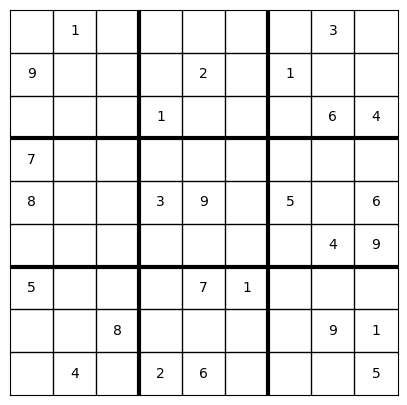

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)
linesX = [ax.plot([0,1],[i/9,i/9],transform=ax.transAxes,linewidth=3,color='black') if i%3 == 0 else ax.plot([0,1],[i/9,i/9],transform=ax.transAxes,linewidth=1,color='black') for i in range(1,9)]
linesY = [ax.plot([i/9,i/9],[0,1],transform=ax.transAxes,linewidth=3,color='black') if i%3 == 0 else ax.plot([i/9,i/9],[0,1],transform=ax.transAxes,linewidth=1,color='black') for i in range(1,9)]
values = [ax.text(((i % 9) + 0.5) / 9,1 - (((i // 9) + 0.5) / 9),'0',transform=ax.transAxes,horizontalalignment='center',verticalalignment='center',fontsize=10) for i in range(81)]

def update(hist):
    #print(hist)
    for i in range(len(hist)):
        x,y = i % 9,i // 9
        if hist[i] == 0:
            values[i].set_visible(False)
        else:
            values[i].set_text(hist[i])
            values[i].set_visible(True)
            if s.known[i]:
                #Write in black
                values[i].set_color('black')
            else:
                #Write in red
                values[i].set_color('red')
    return values

anim = animation.FuncAnimation(fig,update,interval=1,blit=True,frames=iter(s.history))

In [ ]:
path = 'Name'

In [ ]:
anim.save(path+'.mp4',fps=100)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
